In [0]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [0]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Your work

# General information
##### The test has two main parts:


* [1 Answering questions](#qe)
* [2 Predicting the outcome for each ATP tennis game during the year 2017](#Pr)

In [0]:
#Importing some packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

First of all let's have a general idea about our dataset then we will dive more in the data exploration section in **Part 2**.

In [43]:
df_atp.head()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LPts,LRank,Location,Loser,Lsets,MaxL,MaxW,PSL,PSW,Round,SBL,SBW,SJL,SJW,Series,Surface,Tournament,UBL,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets,Winner_VictoryPourc,Loser_VictoryPourc
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,77.0,Adelaide,Ljubicic I.,0.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,63.0,Dosedel S.,2.0,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,Adelaide,Clement A.,0.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,5.0,Enqvist T.,2.0,0.0,0.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,655.0,Adelaide,Baccanello P.,1.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,7.0,6.0,NaN,NaN,NaN,40.0,Escude N.,2.0,0.0,0.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,Adelaide,Knippschild J.,0.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,65.0,Federer R.,2.0,0.0,0.0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,Completed,Outdoor,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,198.0,Adelaide,Woodbridge T.,1.0,NaN,NaN,NaN,NaN,1st Round,NaN,NaN,NaN,NaN,International,Hard,Australian Hardcourt Championships,NaN,NaN,7.0,5.0,6.0,NaN,NaN,NaN,81.0,Fromberg R.,2.0,0.0,0.0


<a id="qe"></a>
## Answering the questions#

##### Who are the three ATP players with the most wins ?



In [44]:
df_atp['Winner'].value_counts().nlargest(3).keys()

Index(['Federer R.', 'Nadal R.', 'Djokovic N.'], dtype='object')

##### How many sets did the player “​Federer R.” win in total ?

In [45]:
Winner_WonSets=df_atp.loc[df_atp['Winner'] == 'Federer R.', 'Wsets'] # won sets as Frederer is a winner
Winner_WonSets #we can see that there is some Nan Values we have to check it out

3        2.0
168      3.0
229      3.0
316      2.0
329      2.0
        ... 
52265    NaN
52274    2.0
52279    2.0
52288    2.0
52292    2.0
Name: Wsets, Length: 1121, dtype: float64

In [46]:
Winner_WonSets.describe()# we can change the Nan value with the avg of the wonsets since we don't have so many outliner values

count    1112.000000
mean        2.289568
std         0.511575
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Wsets, dtype: float64

In [47]:
Winner_WonSets=Winner_WonSets.fillna(int(df_atp.Wsets.mean()))
Winner_WonSets

3        2.0
168      3.0
229      3.0
316      2.0
329      2.0
        ... 
52265    2.0
52274    2.0
52279    2.0
52288    2.0
52292    2.0
Name: Wsets, Length: 1121, dtype: float64

In [48]:
Winner_WonSets.sum()

2564.0

In [49]:
df_atp.loc[df_atp['Loser'] == 'Federer R.', 'Lsets'].value_counts()
 # we can see that there is a string (a misstyping error of 1) so we have to make it all an int type

1.0    114
0.0     97
2.0     18
Name: Lsets, dtype: int64

In [0]:
df_atp.loc[(df_atp['Loser'] == 'Federer R.')& (df_atp['Lsets'] == "`1"), 'Lsets']=1

In [0]:
Loser_WonSets=df_atp.loc[df_atp['Loser'] == 'Federer R.', 'Lsets'].value_counts()

In [52]:
Loser_WonSets=df_atp.loc[df_atp['Loser'] == 'Federer R.', 'Lsets']
Loser_WonSets=pd.to_numeric(Loser_WonSets)
Loser_WonSets.describe()

count    229.000000
mean       0.655022
std        0.620366
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Lsets, dtype: float64

In [0]:
Loser_WonSets=Loser_WonSets.fillna(int(Loser_WonSets.mean()))
  

In [54]:
Loser_WonSets.sum()

150.0

In [55]:
print("Total wins : {0:.4f}".format(Loser_WonSets.sum()+Winner_WonSets.sum()))

Total wins : 2714.0000


##### How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?


In [56]:
df_atp['Date'] = pd.to_datetime(df_atp['Date'])
df_atp['Date'].dt.year


0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
52293    2018
52294    2018
52295    2018
52296    2018
52297    2018
Name: Date, Length: 52298, dtype: int64

In [57]:
array = [2016, 2017]
Winner_WonSets_Date=df_atp[(df_atp['Winner'] == 'Federer R.') & (df_atp['Date'].dt.year.isin(array))]['Wsets'] # won sets as Frederer is a winner in 2016 and 2017
Winner_WonSets_Date=Winner_WonSets_Date.fillna(int(df_atp.Wsets.mean()))
Winner_WonSets_Date.sum()

174.0

In [58]:
Loser_WonSets_Date=df_atp[(df_atp['Loser'] == 'Federer R.') & (df_atp['Date'].dt.year.isin(array))]['Lsets']
Loser_WonSets_Date.sum()

10.0

In [59]:
print("Total wins in 2016 and 2017 : {0:.4f}".format(Winner_WonSets_Date.sum()+Loser_WonSets_Date.sum()))

Total wins in 2016 and 2017 : 184.0000


##### For each match, what is the percentage of victories of the winner in the past ?


In [0]:
def pourc(Player,CMD):#current match date (CMD)
  CMD=datetime.strptime(CMD, '%Y-%m-%d')
  wins=df_atp[(df_atp['Winner'] == Player) & (df_atp['Date']<CMD)]
  wins=wins.shape[0]
  TotalGames=df_atp[((df_atp['Winner'] == Player)|(df_atp['Loser'] == Player) )& (df_atp['Date']<CMD)]
  Total=TotalGames.shape[0]
  pourcentage=0
  if Total>0:
    pourcentage=(wins/Total)*100
    pourcentage=round(pourcentage,2)
  return pourcentage

In [61]:
print("Percentage of victories for the player Knippschild J. ", "is ",pourc('Knippschild J.','2014-05-03'),"%")

Percentage of victories for the player Knippschild J.  is  33.33 %


In [62]:
print("Percentage of victories for the player Federer R. ", "is ",pourc('Federer R.','2019-01-11'),"%")

Percentage of victories for the player Federer R.  is  82.85 %


<a id="Pr"></a>
## Predict the outcome for each ATP tennis game during the year 2017#



## 1.   Data preparation process



Before we begin training our model, we need to wrangle the data into a format that is more conducive for machine learnin:<br> We need to convert the columns in the dataset to the correct types. For example,earlier we made sure the date columns are in the datetime format and some numerial columns are either interger or floats, we have to do the same things to other columns. This will help reduce the memory in use and make the feature engineering process easier.

In [0]:

df_atp['Winner_VictoryPourc']=df_atp.apply(lambda x: pourc(x['Winner'], x['Date'].strftime("%Y-%m-%d")), axis=1)

In [0]:
df_atp['Loser_VictoryPourc']=df_atp.apply(lambda x: pourc(x['Loser'], x['Date'].strftime("%Y-%m-%d")), axis=1)

In [0]:
# we set the **erros** to coerce so any non-numerical values in the numerical columns will return an NA
numeric_columns = ['WRank', 'LRank','Wsets','WRank', 'WPts','W1','W2','W3','W4','W5','Winner_VictoryPourc','Loser_VictoryPourc'
                    ,'AvgL','AvgW','B&WL','B&WW','B365L','B365W','CBL','CBW','EXL','EXW','GBW','GBL','IWL','IWW','L1',
                   'L2','L3','L4','L5','LBL','LBW','LPts','LRank','Lsets','MaxL','MaxW','PSL','PSW','SBL','SBW','SJL',
                   'SJW','UBL','UBW','W1','W2','W3','W4','W5','WPts','WRank','Wsets']
df_atp[numeric_columns] = df_atp[numeric_columns].apply(pd.to_numeric,errors = 'coerce')

## 2.   Feature exploration and dealing with nans



I also have to consider a number of features before creating the model to provide me the best results, a heatmap  will help me to do that too .Also, I have to choose a set of features that intuitively made sense and make really affects the game outcome.

In [66]:
df = df_atp.loc[:, ['Winner','Loser','AvgL', 'AvgW', 'B&WL', 'B&WW', 'B365L', 'B365W', 'CBL', 'CBW', 'EXL', 'EXW', 'GBL', 'GBW', \
    'IWL', 'IWW', 'L1', 'L2', 'L3', 'L4', 'L5', 'LBL', 'LBW', 'LRank', 'Lsets', 'MaxL', 'MaxW', 'PSL', 'PSW', \
    'SBL', 'SBW', 'SJL', 'SJW', 'UBL', 'UBW', 'W1', 'W2', 'W3', 'W4', 'W5', 'WRank', 'Wsets', \
    'Winner_VictoryPourc', 'Loser_VictoryPourc', "Date"]]
df.head()

,Winner,Loser,AvgL,AvgW,B&WL,B&WW,B365L,B365W,CBL,CBW,EXL,EXW,GBL,GBW,IWL,IWW,L1,L2,L3,L4,L5,LBL,LBW,LRank,Lsets,MaxL,MaxW,PSL,PSW,SBL,SBW,SJL,SJW,UBL,UBW,W1,W2,W3,W4,W5,WRank,Wsets,Winner_VictoryPourc,Loser_VictoryPourc,Date
0,Dosedel S.,Ljubicic I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,63.0,2.0,0.0,0.0,2000-01-03
1,Enqvist T.,Clement A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,56.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,5.0,2.0,0.0,0.0,2000-01-03
2,Escude N.,Baccanello P.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,3.0,NaN,NaN,NaN,NaN,655.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,6.0,NaN,NaN,40.0,2.0,0.0,0.0,2000-01-03
3,Federer R.,Knippschild J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,65.0,2.0,0.0,0.0,2000-01-03
4,Fromberg R.,Woodbridge T.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,4.0,NaN,NaN,NaN,NaN,198.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,6.0,NaN,NaN,81.0,2.0,0.0,0.0,2000-01-03


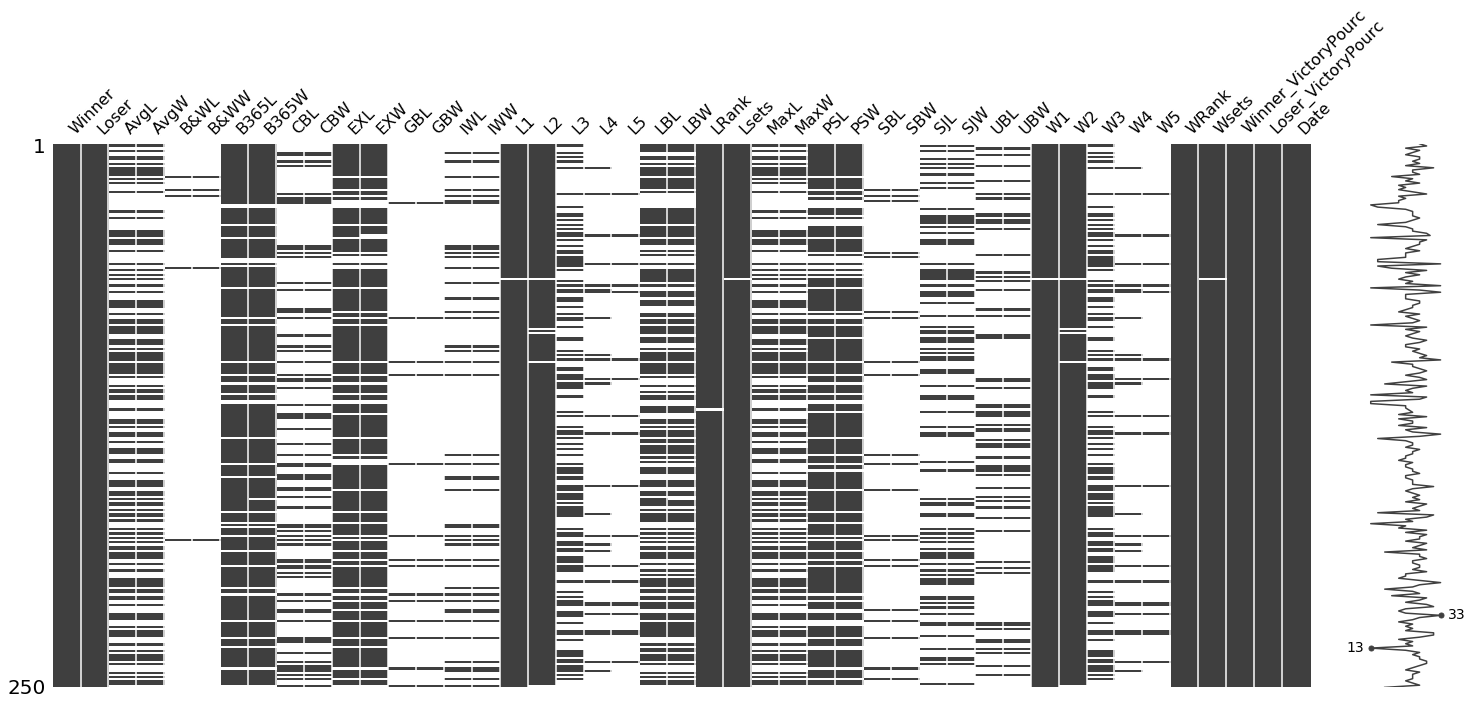

In [67]:
import missingno as msno

msno.matrix(df.sample(250))#This shows missing values in our data, White fields indicate NA’s in a sample of 250

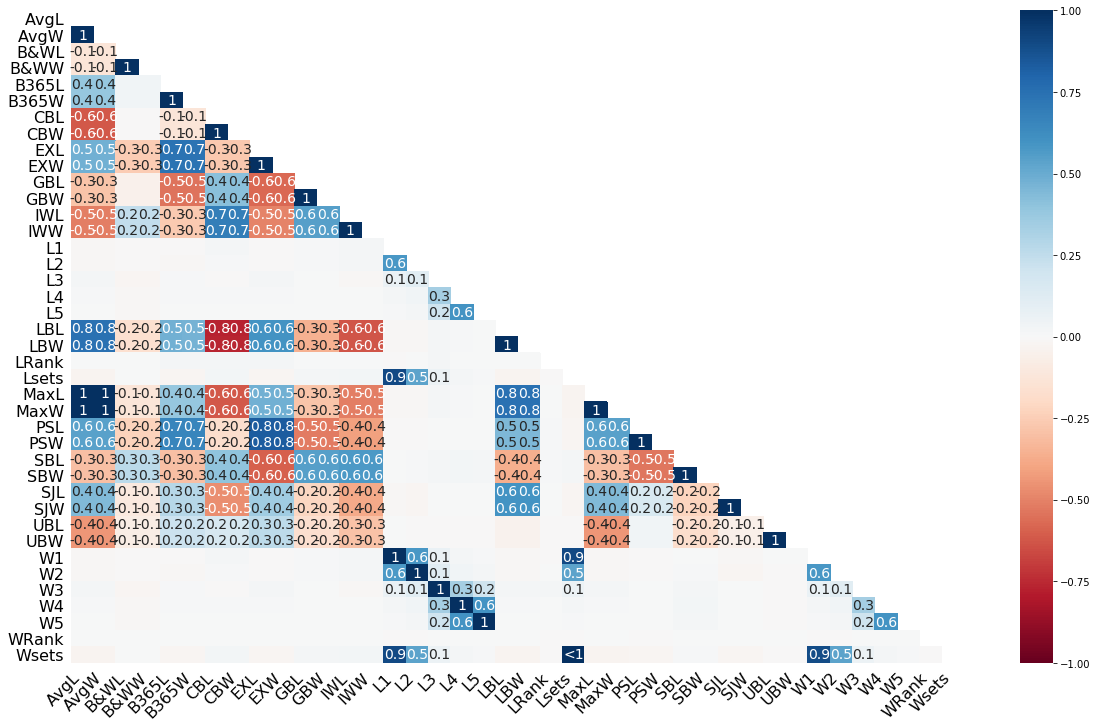

In [68]:
msno.heatmap(df)#The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the Tournament and Winner columns, which are completely filled(does not contain NANs), are not included.

### 2.1   Overview of data missing values



As we have seen in the matrix above, The columns with the most NA's are those Match odd and number of games per set (won/lost ) related.Ranks too have some missing values.

In [69]:
print("Percentage of missing values in CBW column : " + str(np.round(100*np.sum(df.CBW.isna())/len(df), 2))+"%")
print("Percentage of missing values in CBL column : " + str(np.round(100*np.sum(df.CBL.isna())/len(df), 2))+"%")  

Percentage of missing values in CBW column : 66.53%
Percentage of missing values in CBL column : 66.53%


In [70]:
print("Percentage of missing values in WRank column : " + str(np.round(100*np.sum(df.WRank.isna())/len(df), 2))+"%")
print("Percentage of missing values in LRank column : " + str(np.round(100*np.sum(df.LRank.isna())/len(df), 2))+"%")  

Percentage of missing values in WRank column : 0.03%
Percentage of missing values in LRank column : 0.2%


We can drop some columns that has more of 70% of its values is Nan

In [0]:
df = df.loc[:, df.isnull().mean() < .7]

Now we will imputer the other columns Nans

In [72]:
df.head()

,Winner,Loser,AvgL,AvgW,B365L,B365W,CBL,CBW,EXL,EXW,L1,L2,L3,LBL,LBW,LRank,Lsets,MaxL,MaxW,PSL,PSW,W1,W2,W3,WRank,Wsets,Winner_VictoryPourc,Loser_VictoryPourc,Date
0,Dosedel S.,Ljubicic I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,63.0,2.0,0.0,0.0,2000-01-03
1,Enqvist T.,Clement A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,56.0,0.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,5.0,2.0,0.0,0.0,2000-01-03
2,Escude N.,Baccanello P.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,3.0,NaN,NaN,655.0,1.0,NaN,NaN,NaN,NaN,6.0,7.0,6.0,40.0,2.0,0.0,0.0,2000-01-03
3,Federer R.,Knippschild J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,87.0,0.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,65.0,2.0,0.0,0.0,2000-01-03
4,Fromberg R.,Woodbridge T.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,4.0,NaN,NaN,198.0,1.0,NaN,NaN,NaN,NaN,7.0,5.0,6.0,81.0,2.0,0.0,0.0,2000-01-03


#### Ranking imputation

We'll try to see some per-player Date - Rank relationship.

In [0]:
import plotnine as pln

def rank_per_date(P,df):
  winData = df.loc[df.Winner==P,['Date', 'WRank']]
  loseData = df.loc[df.Loser==P,['Date','LRank']]
    
  RankData = pd.DataFrame({'Date':pd.concat([winData.Date, loseData.Date], axis=0), 
                             'Rank':pd.concat([winData.WRank, loseData.LRank], axis=0)})
  RankData.sort_index(axis=0, inplace=True)
  RankData['Date'] = RankData['Date'].apply(lambda x : x.year +(x.month-1)/12)
  RankData.dropna(inplace=True)
  return RankData

**Frederer**

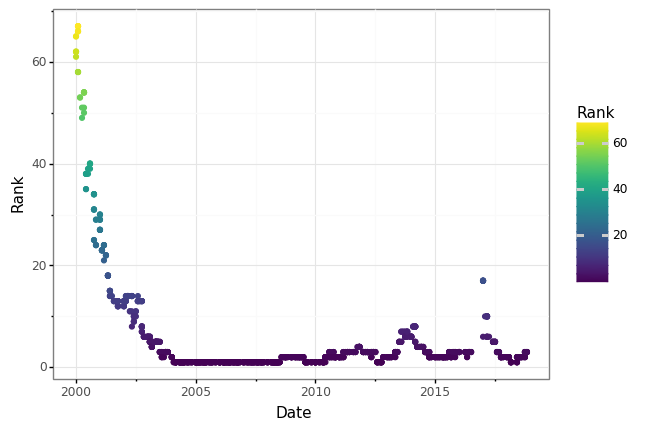

<ggplot: (-9223363269916862513)>

In [74]:

pln.ggplot(rank_per_date('Federer R.',df), pln.aes(x='Date', y='Rank'))+pln.geom_point(pln.aes(colour='Rank'))+pln.theme_bw()

Dosedel

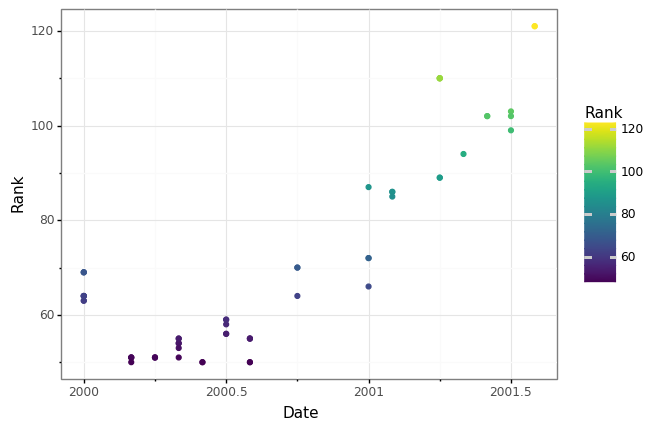

<ggplot: (8766911908616)>

In [75]:
pln.ggplot(rank_per_date('Dosedel S.',df), pln.aes(x='Date', y='Rank'))+pln.geom_point(pln.aes(colour='Rank'))+pln.theme_bw()

We can see that there is a linear relationship between rank and date but the shape can variy of course from a player to another one, in this case, we will fit a simple polynomial regression or Imputing using autoimpite package.

In [76]:
  pip install git+https://github.com/kearnz/autoimpute.git

  Cloning https://github.com/kearnz/autoimpute.git to /tmp/pip-req-build-_d39bcfr
  Running command git clone -q https://github.com/kearnz/autoimpute.git /tmp/pip-req-build-_d39bcfr
  Created wheel for autoimpute: filename=autoimpute-0.11.6-py2.py3-none-any.whl size=89957 sha256=972933aa6e433601b0f6215d0be6ec62fb2da2b2c43f30cae83159016bb40516
  Stored in directory: /tmp/pip-ephem-wheel-cache-f65yr6n1/wheels/4f/dd/a1/18e3814356af40a7615b271d39cac7c3cd0f92aa67b2a714c1
Successfully built autoimpute


In [0]:
from autoimpute.imputations import SingleImputer
si = SingleImputer(strategy='mean') 
imp=si.fit_transform(df._get_numeric_data())

In [0]:
df = df.join(imp[imp.columns.difference(df.columns)])
for column in df.columns:
    for c in imp.columns:
      if column==c:
        df[column]=imp[column]


In [79]:
df.head()

,Winner,Loser,AvgL,AvgW,B365L,B365W,CBL,CBW,EXL,EXW,L1,L2,L3,LBL,LBW,LRank,Lsets,MaxL,MaxW,PSL,PSW,W1,W2,W3,WRank,Wsets,Winner_VictoryPourc,Loser_VictoryPourc,Date
0,Dosedel S.,Ljubicic I.,3.594448,1.834821,3.551805,1.823768,3.000658,1.81208,3.26218,1.802489,4.0,2.0,3.607104,3.451461,1.810226,77.0,0.0,8.326076,1.99861,4.186818,1.926742,6.0,6.0,6.025052,63.0,2.0,0.0,0.0,2000-01-03
1,Enqvist T.,Clement A.,3.594448,1.834821,3.551805,1.823768,3.000658,1.81208,3.26218,1.802489,3.0,3.0,3.607104,3.451461,1.810226,56.0,0.0,8.326076,1.99861,4.186818,1.926742,6.0,6.0,6.025052,5.0,2.0,0.0,0.0,2000-01-03
2,Escude N.,Baccanello P.,3.594448,1.834821,3.551805,1.823768,3.000658,1.81208,3.26218,1.802489,7.0,5.0,3.000000,3.451461,1.810226,655.0,1.0,8.326076,1.99861,4.186818,1.926742,6.0,7.0,6.000000,40.0,2.0,0.0,0.0,2000-01-03
3,Federer R.,Knippschild J.,3.594448,1.834821,3.551805,1.823768,3.000658,1.81208,3.26218,1.802489,1.0,4.0,3.607104,3.451461,1.810226,87.0,0.0,8.326076,1.99861,4.186818,1.926742,6.0,6.0,6.025052,65.0,2.0,0.0,0.0,2000-01-03
4,Fromberg R.,Woodbridge T.,3.594448,1.834821,3.551805,1.823768,3.000658,1.81208,3.26218,1.802489,6.0,7.0,4.000000,3.451461,1.810226,198.0,1.0,8.326076,1.99861,4.186818,1.926742,7.0,5.0,6.000000,81.0,2.0,0.0,0.0,2000-01-03


### 2.2  Feature engineering


Now, we are creating our target and to make the target a bit random we have chosen to set names alphabitically **because in our dataset loser column is first so the target will always be 0.**


*   1 if player 1 wins
*   0 if player 1 loses



We will also create new columns, each column will be the difference value between player1 and player 2

In [0]:
Target=[]
Player1=[]
Player2=[]
AvgP=[]
B365P=[]
EXP=[]
P1=[]
P2=[]
LBP=[]
Rank=[]
Sets=[]
Max=[]
PSP=[]
LBP=[]
Player_VictoryPourc=[]



for index, row in df.iterrows():
    if row["Winner"]==min(row["Winner"],row["Loser"]):
      Player1.append(row["Winner"])
      Player2.append(row["Loser"])
      AvgP.append(row["AvgW"]-row["AvgL"])
      B365P.append(row["B365W"]-row["B365L"])
      EXP.append(row["EXW"]-row["EXL"])
      P1.append(row["W1"]-row["L1"])
      P2.append(row["W2"]-row["L2"])
      LBP.append(row["LBW"]-row["LBL"])
      Rank.append(row["WRank"]-row["LRank"])
      Sets.append(row["Wsets"]-row["Lsets"])
      Max.append(row["MaxW"]-row["MaxL"])
      PSP.append(row["PSW"]-row["PSL"])
      Player_VictoryPourc.append(row["Winner_VictoryPourc"]-row["Loser_VictoryPourc"])
      Target.append(1)
    else:
      Player1.append(row["Loser"])
      Player2.append(row["Winner"])
      Target.append(0)
      AvgP.append(row["AvgL"]-row["AvgW"])
      B365P.append(row["B365L"]-row["B365W"])
      EXP.append(row["EXL"]-row["EXW"])
      P1.append(row["L1"]-row["W1"])
      P2.append(row["L2"]-row["W2"])
      LBP.append(row["LBL"]-row["LBW"])
      Rank.append(row["LRank"]-row["WRank"])
      Sets.append(row["Lsets"]-row["Wsets"])
      Max.append(row["MaxL"]-row["MaxW"])
      PSP.append(row["PSL"]-row["PSW"])
      Player_VictoryPourc.append(row["Loser_VictoryPourc"]-row["Winner_VictoryPourc"])


In [0]:
df=df.drop((x for x in df.columns.tolist() if (x.startswith('W')|x.startswith('L')|x.endswith('W'))|x.endswith('L')),axis=1)

In [82]:
df.head()

,Date
0,2000-01-03
1,2000-01-03
2,2000-01-03
3,2000-01-03
4,2000-01-03


In [0]:
df['Player1']=Player1
df['Player2']=Player2
df['AvgP']=AvgP
df['B365P']=B365P
df['EXP']=EXP
df['P1']=P1
df['P2']=P2
df['LBP']=LBP
df['Rank']=Rank
df['Sets']=Sets
df['Max']=Max
df['PSP']=PSP
df['Target']=Target

In [84]:
df.head()

,Date,Player1,Player2,AvgP,B365P,EXP,P1,P2,LBP,Rank,Sets,Max,PSP,Target
0,2000-01-03,Dosedel S.,Ljubicic I.,-1.759627,-1.728037,-1.45969,2.0,4.0,-1.641235,-14.0,2.0,-6.327466,-2.260076,1
1,2000-01-03,Clement A.,Enqvist T.,1.759627,1.728037,1.45969,-3.0,-3.0,1.641235,51.0,-2.0,6.327466,2.260076,0
2,2000-01-03,Baccanello P.,Escude N.,1.759627,1.728037,1.45969,1.0,-2.0,1.641235,615.0,-1.0,6.327466,2.260076,0
3,2000-01-03,Federer R.,Knippschild J.,-1.759627,-1.728037,-1.45969,5.0,2.0,-1.641235,-22.0,2.0,-6.327466,-2.260076,1
4,2000-01-03,Fromberg R.,Woodbridge T.,-1.759627,-1.728037,-1.45969,1.0,-2.0,-1.641235,-117.0,1.0,-6.327466,-2.260076,1


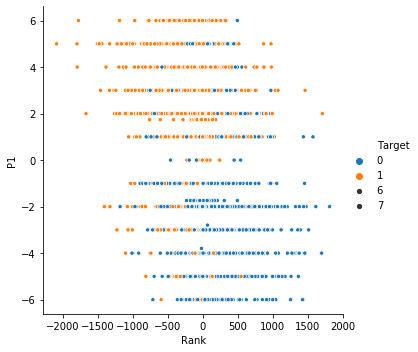

In [128]:
sns.relplot(x="Rank", y="P1", hue="Target", data=df,size=7)


Player 1 mostly wins when the rank difference is negative and have more Number of games won in 1st set

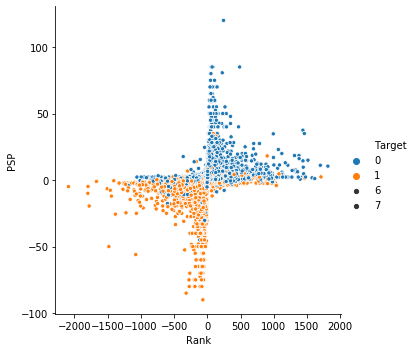

In [129]:
sns.relplot(x="Rank", y="PSP", hue="Target", data=df,size=7)

Winners are mostly people with lower rank and lower psp odds .



since that date matters for every player performance we will transform our datetype column to a value(float).

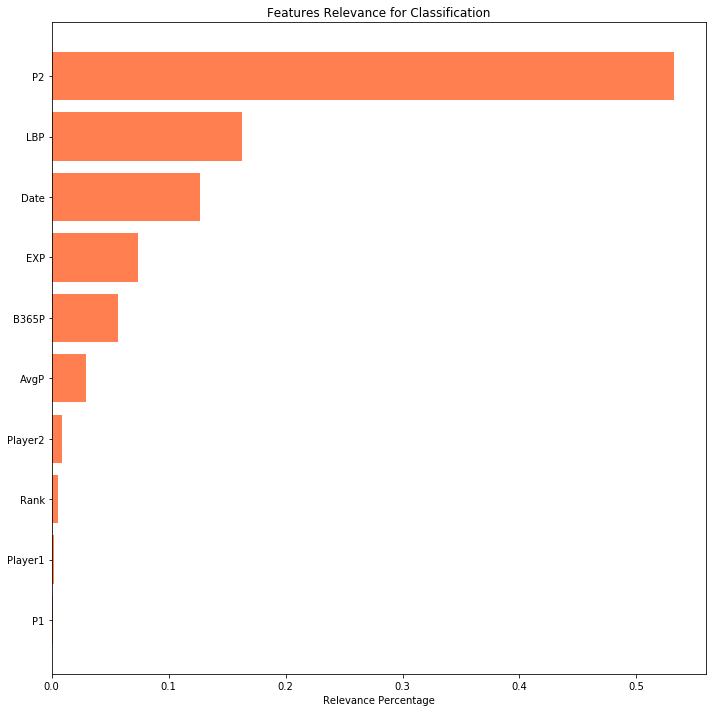

In [130]:

from sklearn.ensemble import RandomForestClassifier
x=df.drop(["Date","Target",'Player1','Player2'],axis=1)
feat_forest = RandomForestClassifier(n_jobs=-1)
feat_forest.fit(x, y=df.loc[:, "Target"])

plt.figure(figsize=(10, 10))
feat_imp = feat_forest.feature_importances_
cols = df.columns

feat_imp, cols = zip(*sorted(zip(feat_imp, cols)))

plt.barh(range(len(cols)), feat_imp, align="center", color='coral');
plt.yticks(range(len(cols)), cols)
plt.title("Features Relevance for Classification")
plt.xlabel("Relevance Percentage")
plt.tight_layout();

P1 has no relevance in our prediction, so it's better to drop it.


In [0]:
df=df.drop("P1",axis=1)

Now, we will create dummy variables for our players if the player has played the match then the column value will be 1 otherwise it will be 0

In [0]:
data = pd.get_dummies(df, drop_first=True)

In [133]:
data.head()

,Date,AvgP,B365P,EXP,P2,LBP,Rank,Sets,Max,PSP,Target,Player1_Abdulla M.,Player1_Abel M.,Player1_Acasuso J.,Player1_Adaktusson J.,Player1_Agaev E.,Player1_Agassi A.,Player1_Agenor R.,Player1_Ager J.,Player1_Agostinelli B.,Player1_Aguilar J.,Player1_Ahouda A.,Player1_Al Ghareeb M.,Player1_Al Khulaifi N.G.,Player1_Al Mutawa J.,Player1_Al-Alawi S.K.,Player1_Al-Ghareeb M.,Player1_Alami K.,Player1_Alawadhi O.,Player1_Albert M.,Player1_Albot R.,Player1_Alcaide G.,Player1_Aldi F.,Player1_Ali Mutawa J.M.,Player1_Allegro Y.,Player1_Almagro N.,Player1_Almagro N.,Player1_Alonso J.,Player1_Altamirano C.,Player1_Altmaier D.,...,Player2_Young D.,Player2_Youzhny A.,Player2_Youzhny M.,Player2_Youzhny M.,Player2_Yu X.Y.,Player2_Yuksel A.,Player2_Zabaleta M.,Player2_Zampieri C.,Player2_Zapata Miralles B.,Player2_Zayed M. S.,Player2_Zayed M.S.,Player2_Zayid M. S.,Player2_Zayid M.S.,Player2_Zeballos H.,Player2_Zeballos H.,Player2_Zekic M.,Player2_Zemlja G.,Player2_Zeng S.X.,Player2_Zhang Y.,Player2_Zhang Z.,Player2_Zhang Ze,Player2_Zhang Zh.,Player2_Zhu B.Q.,Player2_Ziadi M.,Player2_Zib T.,Player2_Zimonjic N.,Player2_Zitko R.,Player2_Zlatanovic A.,Player2_Zopp J.,Player2_Zovko L.,Player2_Zverev A.,Player2_Zverev M.,Player2_de Chaunac S.,Player2_de Voest R.,Player2_di Mauro A.,Player2_di Pasquale A.,Player2_van Gemerden M.,Player2_van Lottum J.,Player2_van Scheppingen D.,Player2_van der Meer N.
0,2000-01-03,-1.759627,-1.728037,-1.45969,4.0,-1.641235,-14.0,2.0,-6.327466,-2.260076,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000-01-03,1.759627,1.728037,1.45969,-3.0,1.641235,51.0,-2.0,6.327466,2.260076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2000-01-03,1.759627,1.728037,1.45969,-2.0,1.641235,615.0,-1.0,6.327466,2.260076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000-01-03,-1.759627,-1.728037,-1.45969,2.0,-1.641235,-22.0,2.0,-6.327466,-2.260076,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000-01-03,-1.759627,-1.728037,-1.45969,-2.0,-1.641235,-117.0,1.0,-6.327466,-2.260076,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Training Time

### Splitting our data into text and train

In [0]:
test_year=2017
df_train = data.iloc[df_atp[df_atp["Date"].dt.year != test_year].index]
df_test = data.iloc[df_atp[df_atp["Date"].dt.year == test_year].index]

X_train = df_train.drop(["Target"], axis=1)
y_train = df_train["Target"]

X_test = df_test.drop(["Target"], axis=1)
y_test = df_test["Target"]

### Feature Transformation and scaling

In [0]:
X_train["Date"] = pd.to_numeric(df["Date"], downcast='float')#Casting Datetimes to float to fit our model

In [0]:
y_train=y_train.values.reshape(-1,1)

### Evaluating multiple classification algorithms

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from time import time


In [0]:
def classification_report(y_true, y_pred, name_classifiers, train_time=None):

    assert(len(y_pred) == len(name_classifiers))
    assert(len(train_time) == len(name_classifiers) if train_time else True)
    
    reports = []
    metrics = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"]
    if train_time:
        metrics = metrics + ["Training Duration (seconds)"]

    for idx, y_clf in enumerate(y_pred):
        acc = accuracy_score(y_true, y_clf)
        pre = precision_score(y_true, y_clf)
        rec = recall_score(y_true, y_clf)
        f1s = f1_score(y_true, y_clf)
        report = (name_classifiers[idx], acc, pre, rec, f1s)
        if train_time:
            report = report + (train_time[idx], )
        reports.append(report)
            
    display(pd.DataFrame.from_records(reports, columns=metrics))

In [139]:
names = ["Nearest Neighbors", "Decision Tree",
          "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(5, n_jobs=-1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1),
    MLPClassifier(alpha=0.0001),
    AdaBoostClassifier(),
    GaussianNB()]

y_pred = []
train_time = []

for name, clf in zip(names, classifiers):
    tic = time()
    clf.fit(X_train, y_train)
    toc = time()
    
    y_pred.append(clf.predict(X_train))
    train_time.append(toc - tic)
    
    print("Classifier : {} ===> Training duration : {} sec".format(name, train_time[-1]))

Classifier : Nearest Neighbors ===> Training duration : 30.21807551383972 sec
Classifier : Decision Tree ===> Training duration : 5.630687952041626 sec
Classifier : Random Forest ===> Training duration : 1.2098100185394287 sec
Classifier : Neural Net ===> Training duration : 2172.311530351639 sec
Classifier : AdaBoost ===> Training duration : 52.00479602813721 sec
Classifier : Naive Bayes ===> Training duration : 2.9785659313201904 sec


In [140]:
classification_report(y_train, y_pred, names, train_time)

,Classifier,Accuracy,Precision,Recall,F1-Score,Training Duration (seconds)
0,Nearest Neighbors,0.779917,0.782688,0.785044,0.783864,30.218076
1,Decision Tree,0.999537,0.999643,0.999445,0.999544,5.630688
2,Random Forest,0.924088,0.905211,0.950172,0.927147,1.209810
3,Neural Net,0.508366,0.508366,1.000000,0.674062,2172.311530
4,AdaBoost,0.998631,0.998772,0.998534,0.998653,52.004796
5,Naive Bayes,0.508366,0.508366,1.000000,0.674062,2.978566


We take as metric the F1-score to have a compromise between precision and recall.

In [0]:
X_test["Date"] = pd.to_numeric(X_test["Date"], downcast='float')
y_test=y_test.values.reshape(-1,1)

In [0]:
y_test_pred = []

for name, clf in zip(names, classifiers):
    y_test_pred.append(clf.predict(X_test))


In [143]:
classification_report(y_test, y_test_pred, names)

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Nearest Neighbors,0.485769,0.500000,0.499631,0.499815
1,Decision Tree,0.995825,0.994845,0.997048,0.995945
2,Random Forest,0.806072,0.785908,0.856089,0.819498
3,Neural Net,0.514231,0.514231,1.000000,0.679198
4,AdaBoost,0.993928,0.997030,0.991144,0.994078
5,Naive Bayes,0.514231,0.514231,1.000000,0.679198
